In [2]:
import numpy as np # mathemtaical computation
# numpy is aliased as np
import pandas as pd # data preprocessing
# pandas is aliased as pd
import matplotlib.pyplot as plt # visualization
# pyplot is aliased as plt
import seaborn as sns  # visualization
# seaborn is aliased as sns
import sklearn

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Major Import
import sklearn
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [5]:
df=pd.read_csv('CAR_DETAILS.csv')
df.head()

,name,Brand_name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,Maruti,2007,140000,125000,Petrol,Individual,Manual,First Owner


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   Brand_name     4340 non-null   object
 2   year           4340 non-null   int64 
 3   selling_price  4340 non-null   int64 
 4   km_driven      4340 non-null   int64 
 5   fuel           4340 non-null   object
 6   seller_type    4340 non-null   object
 7   transmission   4340 non-null   object
 8   owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


In [7]:
df.shape

(4340, 9)

In [8]:
df.columns

Index(['name', 'Brand_name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

In [9]:
df.duplicated().sum()

746

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.dtypes

name             object
Brand_name       object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [12]:
df.isnull().sum()

name             0
Brand_name       0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [13]:
#df.drop('',axis=1,inplace=True)
df.columns

Index(['name', 'Brand_name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

In [14]:
df.duplicated().sum()

0

In [15]:
df['name'].nunique()

1491

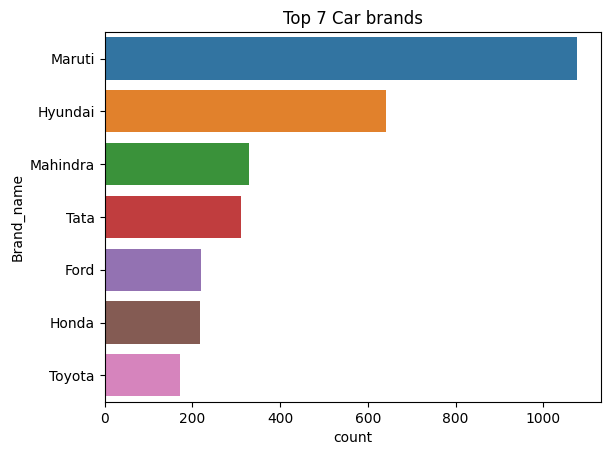

In [16]:
sns.countplot(y=df['Brand_name'],
              order=df['Brand_name'].value_counts().sort_values(ascending=False)[:7].index)
plt.title('Top 7 Car brands')
plt.show()

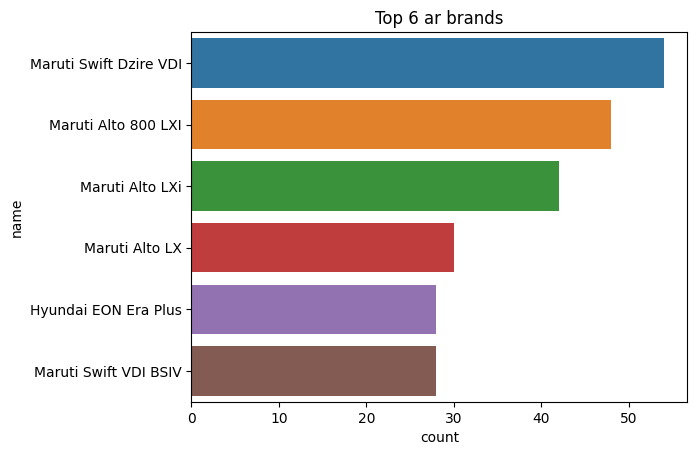

In [17]:
sns.countplot(y=df['name'],
              order=df['name'].value_counts().sort_values(ascending=False)[:6].index)
plt.title('Top 6 ar brands')
plt.show()

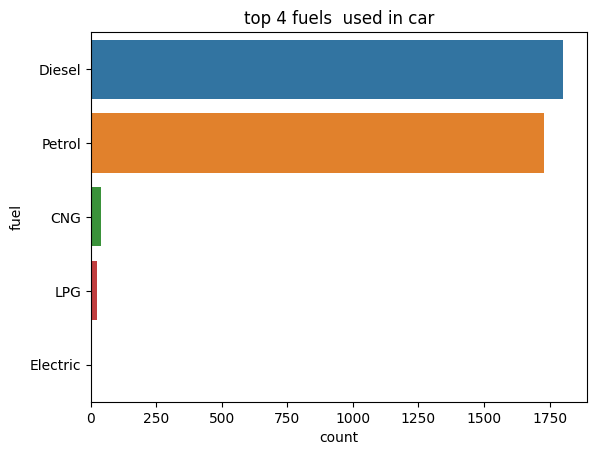

In [18]:
sns.countplot(y=df['fuel'],
              order=df['fuel'].value_counts().sort_values(ascending=False).index)
plt.title('top 4 fuels  used in car')
plt.show()

In [19]:
df.columns

Index(['name', 'Brand_name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

In [22]:
car = df.copy()

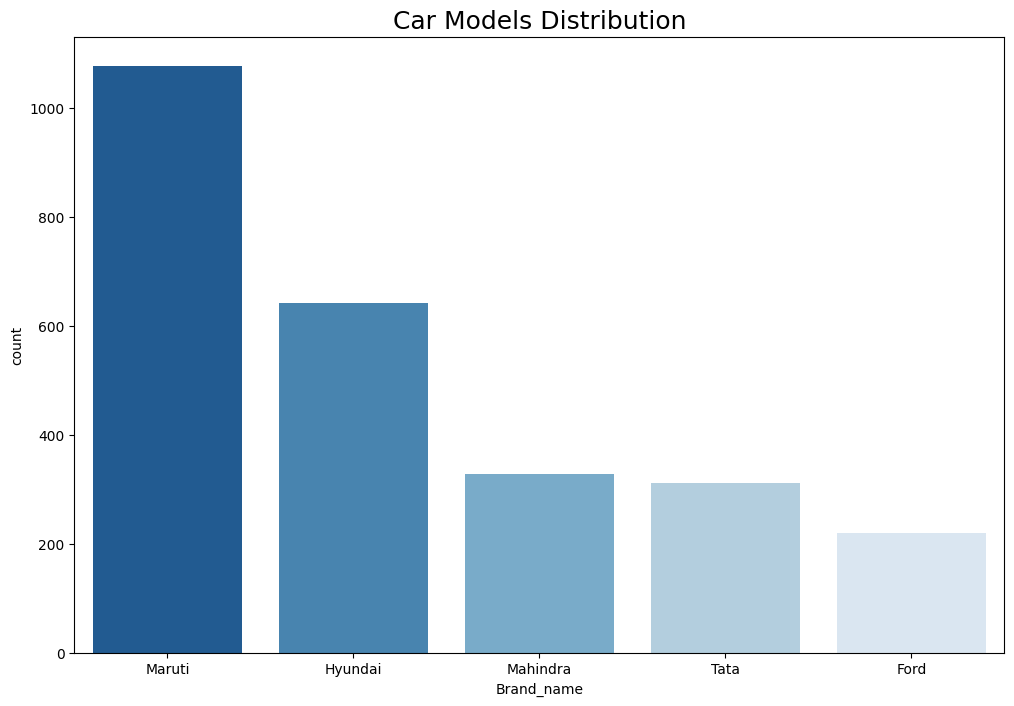

In [23]:
# Plot of Car Models Distribution
figure = plt.figure(figsize=(12,8))
plt.title('Car Models Distribution', fontsize=18)
plot = sns.countplot(x="Brand_name", data=car, order = car['Brand_name'].value_counts().index[:5], palette='Blues_r')
plt.show()

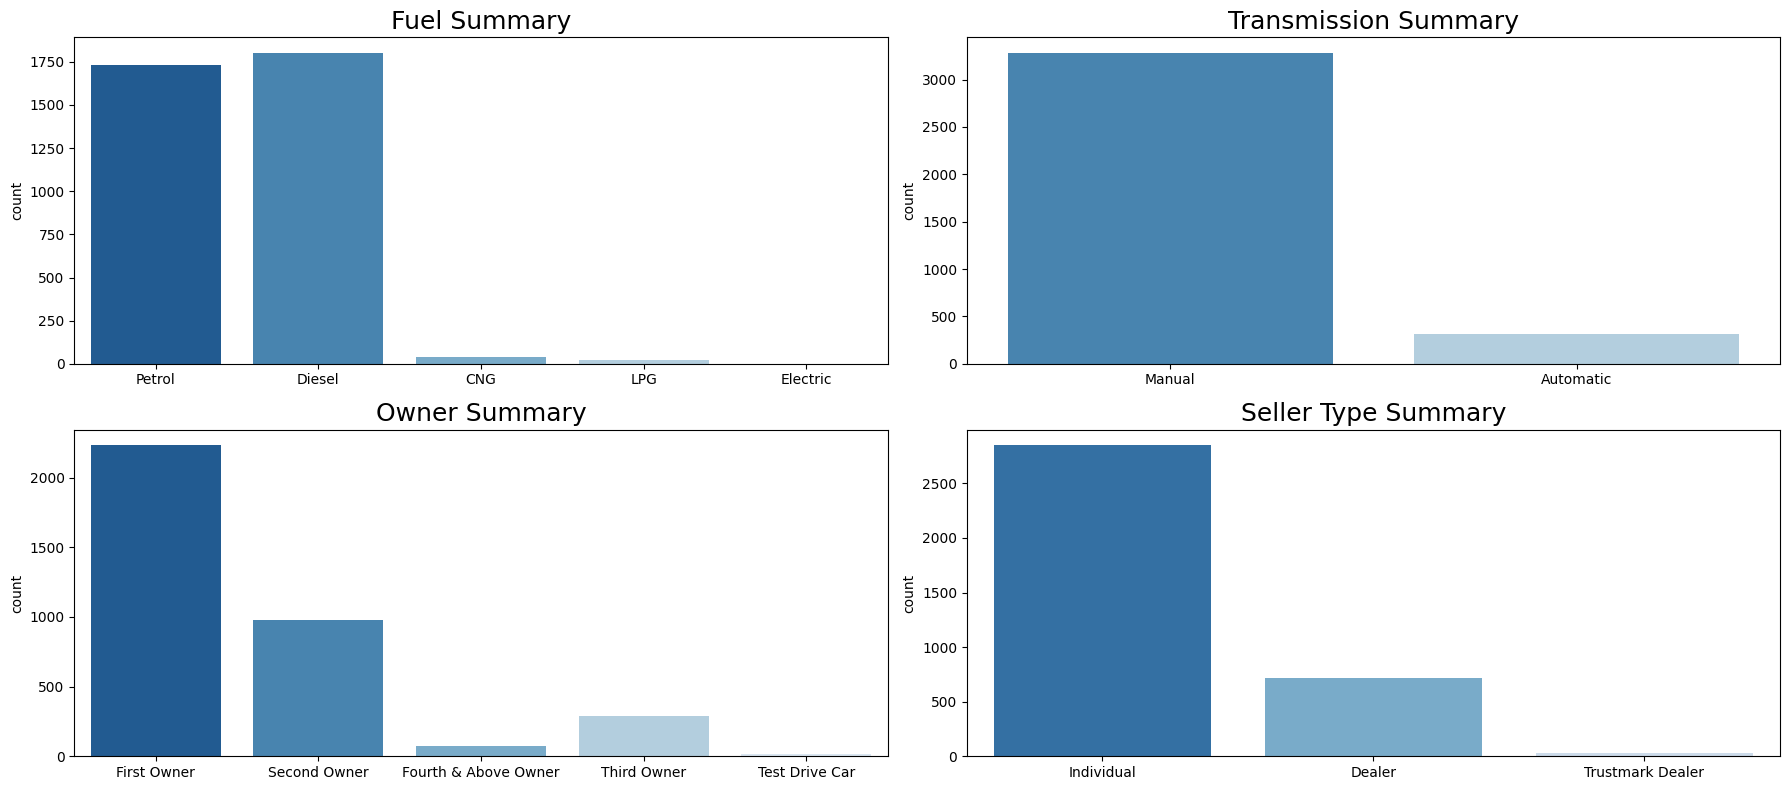

In [24]:
# Subplot of Categorical Summary
plt.figure(figsize=(18,8))

plt.subplot(2,2,1)
plt.title('Fuel Summary', fontsize=18)
sns.countplot(data=car, x='fuel', palette='Blues_r')
plt.xlabel('')
plt.subplot(2,2,2)
plt.title('Transmission Summary', fontsize=18)
sns.countplot(data=car, x='transmission', palette='Blues_r')
plt.xlabel('')
plt.subplot(2,2,3)
plt.title('Owner Summary', fontsize=18)
sns.countplot(data=car, x='owner', palette='Blues_r')
plt.xlabel('')
plt.subplot(2,2,4)
plt.title('Seller Type Summary', fontsize=18)
sns.countplot(data=car, x='seller_type', palette='Blues_r')
plt.xlabel('')

plt.tight_layout()
plt.show()

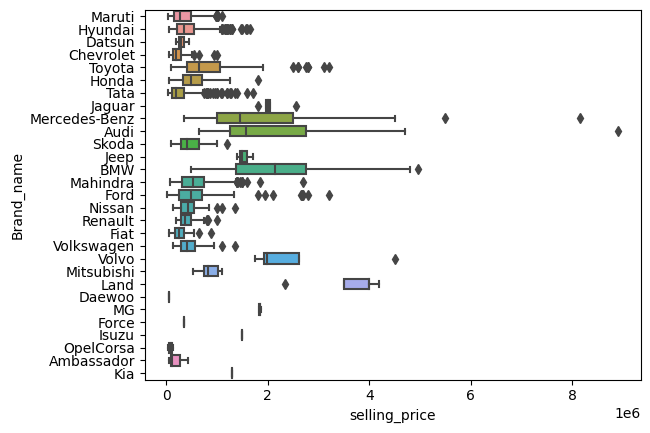

In [25]:
sns.boxplot(y=df['Brand_name'],x=df['selling_price'])
plt.show()

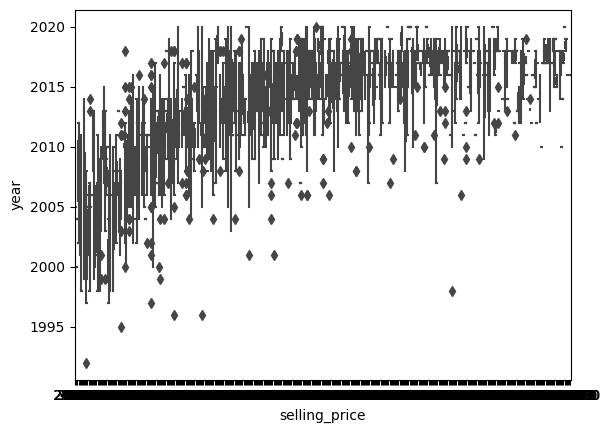

In [26]:
sns.boxplot(y=df['year'],x=df['selling_price'])
plt.show()

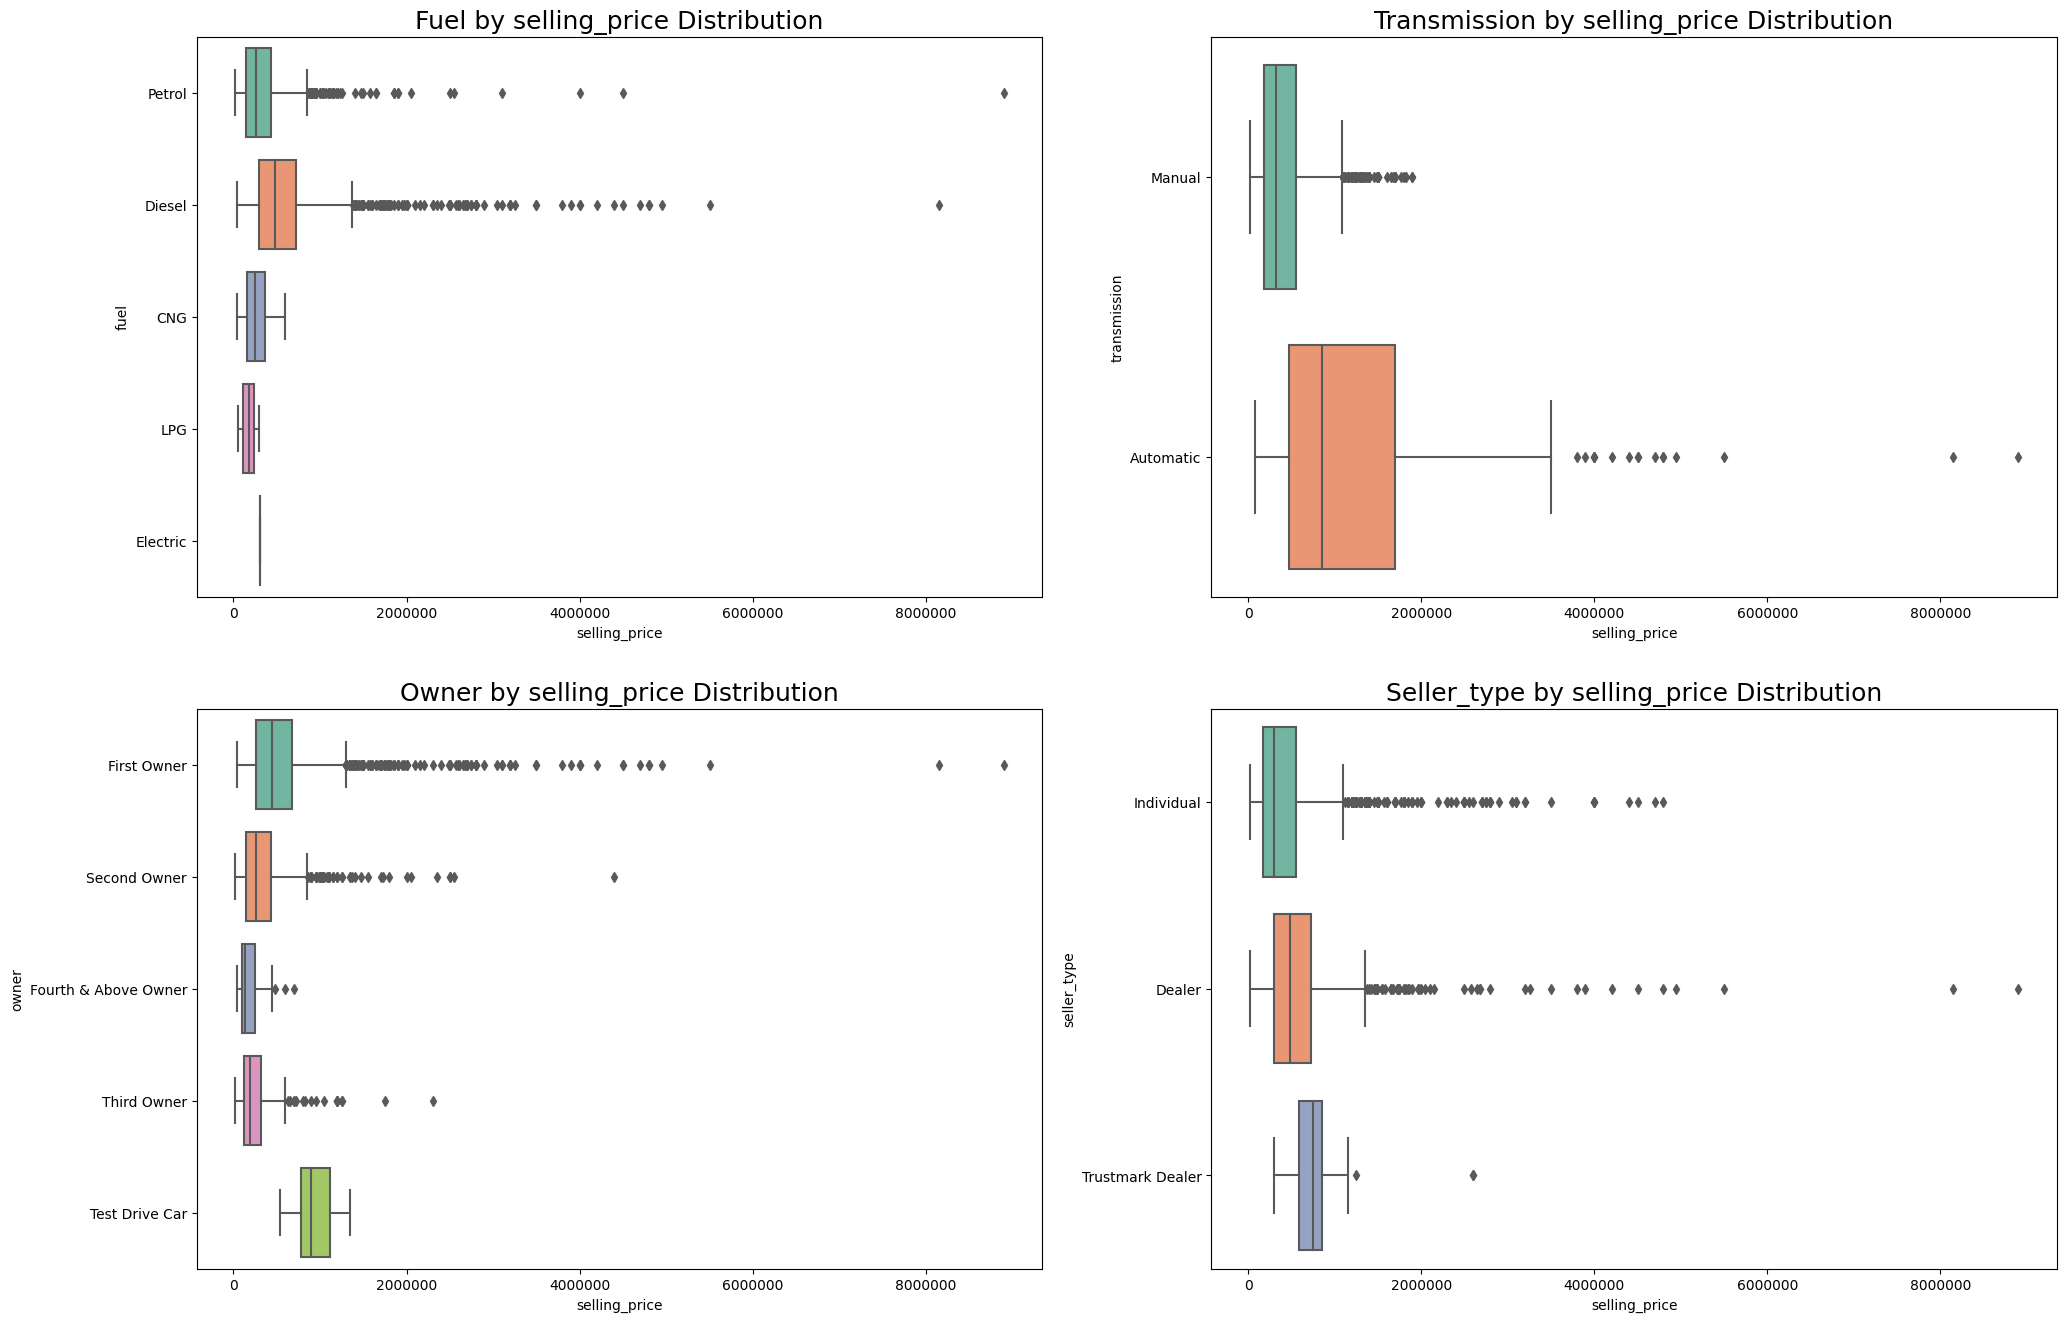

In [27]:
plt.figure(figsize=(24,16))

plt.subplot(2,2,1)
plt.title('Fuel by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='fuel', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,2)
plt.title('Transmission by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='transmission', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,3)
plt.title('Owner by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='owner', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,4)
plt.title('Seller_type by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='seller_type', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')

In [28]:
df.columns

Index(['name', 'Brand_name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

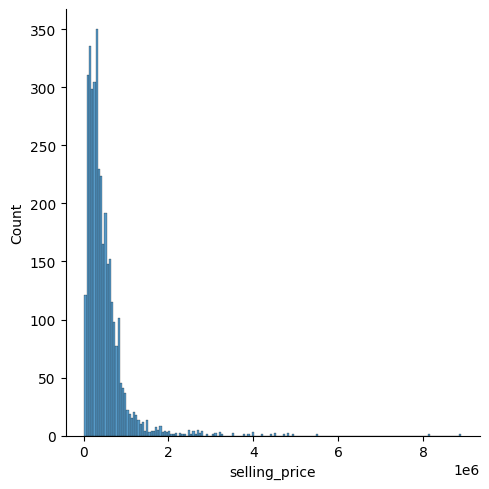

In [29]:
sns.displot(df['selling_price'])
plt.show()

<ipython-input-77-0364341e900e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr =  df.corr()


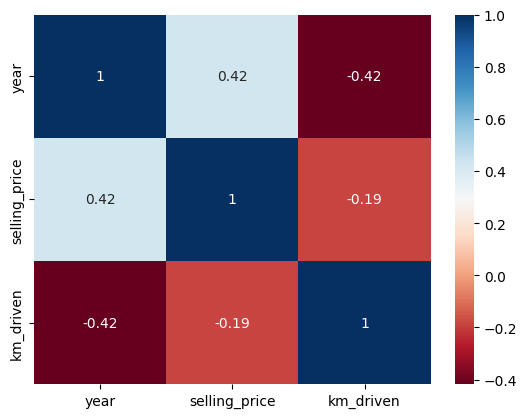

In [77]:
corr =  df.corr()


sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

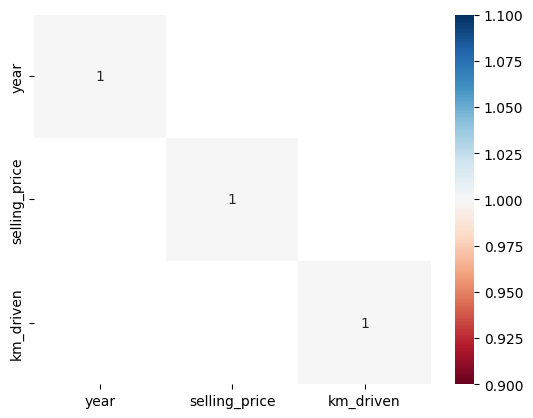

In [78]:
sns.heatmap(corr[abs(corr)>0.7],annot=True,cmap='RdBu')
plt.show()

In [30]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,97%,98%,99%,max
year,3594.0,2012.966333,4.248636,1992.0,2000.00,2003.0,2004.0,2005.0,2013.5,2019.0,2019.0,2020.0,2020.0
selling_price,3594.0,473761.870618,508755.391845,20000.0,51937.77,60000.0,70000.0,80000.0,350000.0,1500000.0,1800000.0,2675000.0,8900000.0
km_driven,3594.0,69222.927657,47530.408343,1.0,1753.94,5000.0,6571.1,10000.0,60000.0,170000.0,192420.0,223046.2,806599.0


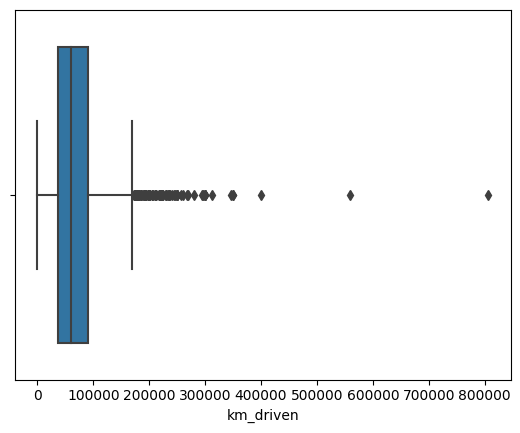

In [31]:
sns.boxplot(x=df['km_driven'])
plt.show()

In [81]:
print(df[df['km_driven']>10000].shape)

(3380, 9)


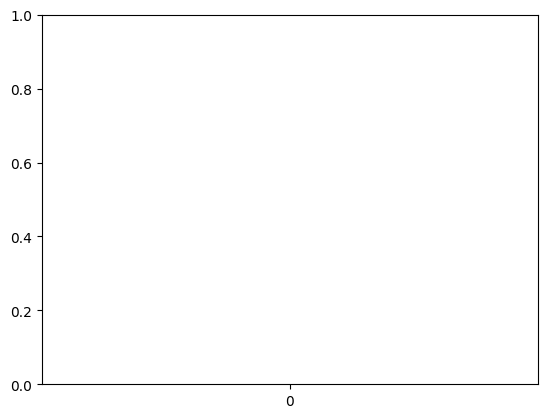

In [34]:
sns.boxplot(X=df['year'])
plt.show()

In [35]:
print(df[df['year']>10].shape)

(3594, 9)


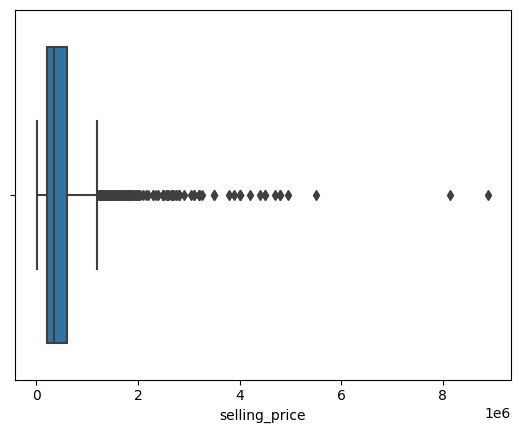

In [36]:
sns.boxplot(x=df['selling_price'])
plt.show()

In [38]:
print(df[df['selling_price']>50000].shape)

(3559, 9)


In [39]:
df['year']= np.where(df['year']>5,10,df['year'])
# df['Weight']= np.where(df['Weight']>3.5,3.5,df['Weight'])

In [40]:
#sns.boxplot(x=df['year'])
#plt.show()

In [41]:
df['Brand_name'].nunique()

29

In [42]:
df.head()

,name,Brand_name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,Maruti,10,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,Maruti,10,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,Hyundai,10,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,Datsun,10,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,Maruti,10,140000,125000,Petrol,Individual,Manual,First Owner


In [43]:
df.drop('name',axis=1,inplace=True)
df.columns

Index(['Brand_name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

In [44]:
x = df.drop('selling_price',axis=1)
y = df['selling_price']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(3594, 7)
(3594,)


In [45]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=80)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2875, 7)
(719, 7)
(2875,)
(719,)


In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [48]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2 Score',r2s)

In [49]:
x_train.dtypes

Brand_name      object
year             int64
km_driven        int64
fuel            object
seller_type     object
transmission    object
owner           object
dtype: object

In [50]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report


In [51]:
step1 = ColumnTransformer(transformers=[('ohe',OneHotEncoder(handle_unknown = 'ignore',categories='auto',
                                                             sparse_output=False),[0,3,4,5,6])],remainder='passthrough')

step2 = LinearRegression()
pipe_lr = Pipeline([('step1',step1),('step2',step2)])
pipe_lr.fit(x_train,y_train)
ypred_lr = pipe_lr.predict(x_test)
eval_model(y_test,ypred_lr)

MAE 175431727773.3957
MSE 7.376034592823647e+24
RMSE 2715885600098.7314
R2 Score -24953755208484.723


In [52]:
print(type(x_test))

<class 'pandas.core.frame.DataFrame'>


In [53]:
import pickle

In [65]:
# Save object to a pickle file
with open("pipeline_lr.pkl", "wb") as file:
    pickle.dump(pipe_lr, file)

# Load object from pickle file
with open("pipeline_lr.pkl", "rb") as file:
    loaded_object = pickle.load(file)


In [66]:
print(type(loaded_object))

<class 'sklearn.pipeline.Pipeline'>


In [68]:
pickle.dump(df,open('car_details_data3.pkl','wb'))

In [58]:
# Save the pipeline object to a file
#with open('pipeline_lr.pkl', 'wb') as f:
#    pickle.dump(pipe_lr, f)

In [69]:
loaded_model = pickle.load(open('pipeline_lr.pkl','rb'))

In [70]:
# Load the saved pipeline object from the file
with open('pipeline_lr.pkl', 'rb') as f:
    loaded_pipeline = pickle.load(f)

In [71]:
#new_df = x.sample(20)
#new_df

In [72]:
print(type(loaded_pipeline))

<class 'sklearn.pipeline.Pipeline'>


In [73]:
predict_price = loaded_pipeline.predict(new_df)

In [74]:
#new_df['predict_price']= predict_price
#new_df.head(20)